<a href="https://colab.research.google.com/github/aashk3/AI-in-Healthcare-/blob/main/Patient%20Risk%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  AI-Based Health Risk Prediction Model from Patient Data

This project uses synthetic patient data to train a machine learning model that predicts a patient's health risk category (Low, Medium, High). It's aimed at demonstrating how AI can be used to assist in preventive healthcare screening using features like age, blood pressure, cholesterol, BMI, smoking habits, and family history of diabetes.

---

## 💡 Technologies Used
- **Python**
- **Pandas / NumPy**
- **Scikit-learn**
- **Random Forest Classifier**
- **Seaborn / Matplotlib**

In [2]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
import pandas as pd
import numpy as np

# --- 1. Generate a Sample Patient Dataset ---
# This dataset simulates patient information relevant for a basic risk assessment.
# It's generated programmatically, so no external upload is needed.

num_patients = 100 # Number of sample patients

# Generate synthetic data for various features
np.random.seed(42) # for reproducibility

patient_ids = [f'P{i+1:03d}' for i in range(num_patients)]
ages = np.random.randint(25, 75, num_patients)
genders = np.random.choice(['Male', 'Female'], num_patients)
systolic_bp = np.random.randint(100, 180, num_patients)
diastolic_bp = np.random.randint(60, 110, num_patients)
cholesterol = np.random.randint(150, 300, num_patients)
smoking_status = np.random.choice(['Yes', 'No'], num_patients, p=[0.3, 0.7])
family_history_diabetes = np.random.choice(['Yes', 'No'], num_patients, p=[0.4, 0.6])
height_cm = np.random.uniform(150, 190, num_patients)
weight_kg = np.random.uniform(50, 120, num_patients)
bmi = weight_kg / ((height_cm / 100)**2) # Calculate BMI

# Simulate a 'RiskScore' and 'Outcome' based on some features (simplified for demonstration)
# Higher age, BP, cholesterol, smoking, and family history increase risk
risk_score = (
    ages * 0.5 +
    systolic_bp * 0.1 +
    diastolic_bp * 0.15 +
    cholesterol * 0.2 +
    (smoking_status == 'Yes') * 20 +
    (family_history_diabetes == 'Yes') * 15 +
    bmi * 0.5
)
risk_score = np.round(risk_score / risk_score.max() * 100).astype(int) # Scale to 0-100

outcomes = []
for score in risk_score:
    if score < 40:
        outcomes.append('Low Risk')
    elif 40 <= score < 70:
        outcomes.append('Medium Risk')
    else:
        outcomes.append('High Risk')

# Create a Pandas DataFrame
patient_data = pd.DataFrame({
    'PatientID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'SystolicBP': systolic_bp,
    'DiastolicBP': diastolic_bp,
    'Cholesterol': cholesterol,
    'SmokingStatus': smoking_status,
    'FamilyHistoryDiabetes': family_history_diabetes,
    'BMI': np.round(bmi, 2),
    'RiskScore': risk_score,
    'Outcome': outcomes
})

# Display the first few rows of the generated dataset
print("--- Generated Sample Patient Data (First 5 Rows) ---")
print(patient_data.head())
print("\n--- Dataset Info ---")
patient_data.info()

# --- 2. Save the DataFrame to a CSV file in Colab's temporary storage ---
# This saves the data to a file named 'patient_data.csv' in the current Colab session's
# file system. This file will be accessible for loading later in the same session.
file_path = '/content/patient_data.csv' # Standard temporary path in Colab
patient_data.to_csv(file_path, index=False) # index=False prevents writing DataFrame index as a column
print(f"\n--- Dataset saved to: {file_path} ---")

# --- 3. Load the Dataset from the CSV file ---
# This simulates loading the data as if it were an external file already present.
# You would use this part of the code in your subsequent Colab notebooks or sections
# to load the data for your risk assessment model.
loaded_data = pd.read_csv(file_path)

print("\n--- Loaded Patient Data (First 5 Rows) ---")
print(loaded_data.head())
print("\n--- Loaded Dataset Info ---")
loaded_data.info()

# You can now use 'loaded_data' DataFrame for your risk assessment model!
# For example, to check columns:
# print(loaded_data.columns)
# To get descriptive statistics:
# print(loaded_data.describe())


--- Generated Sample Patient Data (First 5 Rows) ---
  PatientID  Age  Gender  SystolicBP  DiastolicBP  Cholesterol SmokingStatus  \
0      P001   63    Male         161          105          206           Yes   
1      P002   53  Female         100           77          185            No   
2      P003   39    Male         126           61          169           Yes   
3      P004   67  Female         161           94          214            No   
4      P005   32  Female         176           75          157            No   

  FamilyHistoryDiabetes    BMI  RiskScore      Outcome  
0                   Yes  23.42         94    High Risk  
1                    No  21.35         60  Medium Risk  
2                   Yes  28.95         77    High Risk  
3                    No  33.01         77    High Risk  
4                   Yes  29.32         66  Medium Risk  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy data to avoid modifying the original
data = loaded_data.copy()

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Gender', 'SmokingStatus', 'FamilyHistoryDiabetes']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Also encode the 'Outcome' (Low, Medium, High) for model training
le_outcome = LabelEncoder()
data['OutcomeEncoded'] = le_outcome.fit_transform(data['Outcome'])

# Features and target
X = data[['Age', 'Gender', 'SystolicBP', 'DiastolicBP', 'Cholesterol',
          'SmokingStatus', 'FamilyHistoryDiabetes', 'BMI']]
y = data['OutcomeEncoded']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Split Complete ---")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

--- Data Split Complete ---
Training Samples: 80
Testing Samples: 20



--- Model Accuracy: 80.00% ---

--- Classification Report ---
              precision    recall  f1-score   support

   High Risk       0.78      1.00      0.88        14
 Medium Risk       1.00      0.33      0.50         6

    accuracy                           0.80        20
   macro avg       0.89      0.67      0.69        20
weighted avg       0.84      0.80      0.76        20



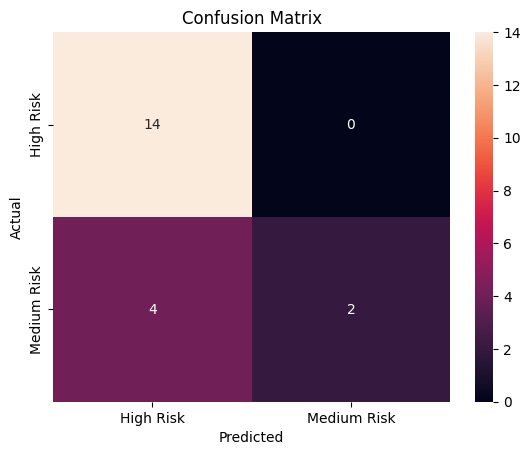

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Model Accuracy: {accuracy * 100:.2f}% ---")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le_outcome.classes_))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


--- Feature Importance ---
                 Feature  Importance
4            Cholesterol    0.219831
0                    Age    0.194540
2             SystolicBP    0.175510
3            DiastolicBP    0.138935
7                    BMI    0.120568
5          SmokingStatus    0.064330
6  FamilyHistoryDiabetes    0.058488
1                 Gender    0.027797


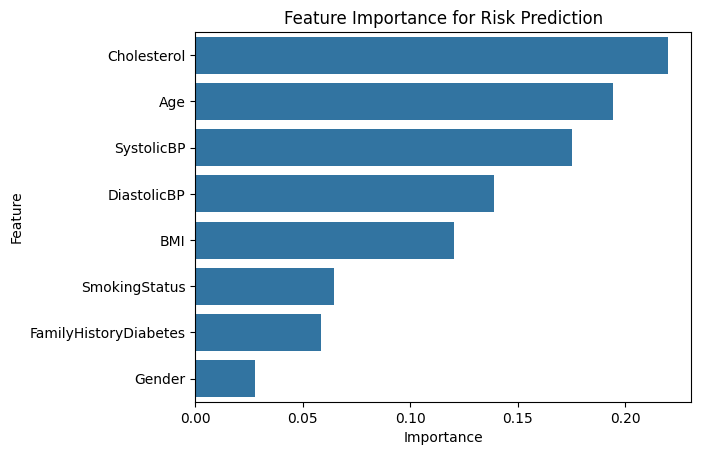

In [11]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance_df)

# Visualize
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Risk Prediction')
plt.show()